In [8]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
real = pd.read_csv('astraland_data.csv')

In [3]:
real.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


## Preprocessing - Pengolahan Data

### Linear Regression

Untuk memprediksi dan menyesuaikan data (fit and predict) kita membutuhkan data numerik.

Kali pertama, kami akan menggunakan `TimeToSubway` dan `TimeToBusStop` karena berdasarkan EDA sebelumnya, kedua *features* mempengaruhi harga secara terlampir pada plot kami.

In [9]:
Counter(real['TimeToSubway'])

Counter({'0-5min': 2759,
         '10min~15min': 806,
         '15min~20min': 953,
         '5min~10min': 1135,
         'no_bus_stop_nearby': 238})

In [11]:
Counter(real['TimeToBusStop'])

Counter({'0~5min': 4509, '10min~15min': 55, '5min~10min': 1327})

mengubah nilai data kategorikal ke numerik. Dengan logika dasar dari plot kami, dapat disimpulkan secara gamblang bahwa semakin dekat, maka harga juga semakin mahal.

Mari kita lihat.

In [12]:
submap = {'0-5min': 4, '5min~10min': 3, '10min~15min': 2, '15min~20min': 1, 'no_bus_stop_nearby': 0}
busmap = {'0~5min': 2, '5min~10min': 1, '10min~15min': 0}

In [13]:
real['TimeToSubway'] = real['TimeToSubway'].map(submap)
real['TimeToBusStop'] = real['TimeToBusStop'].map(busmap)

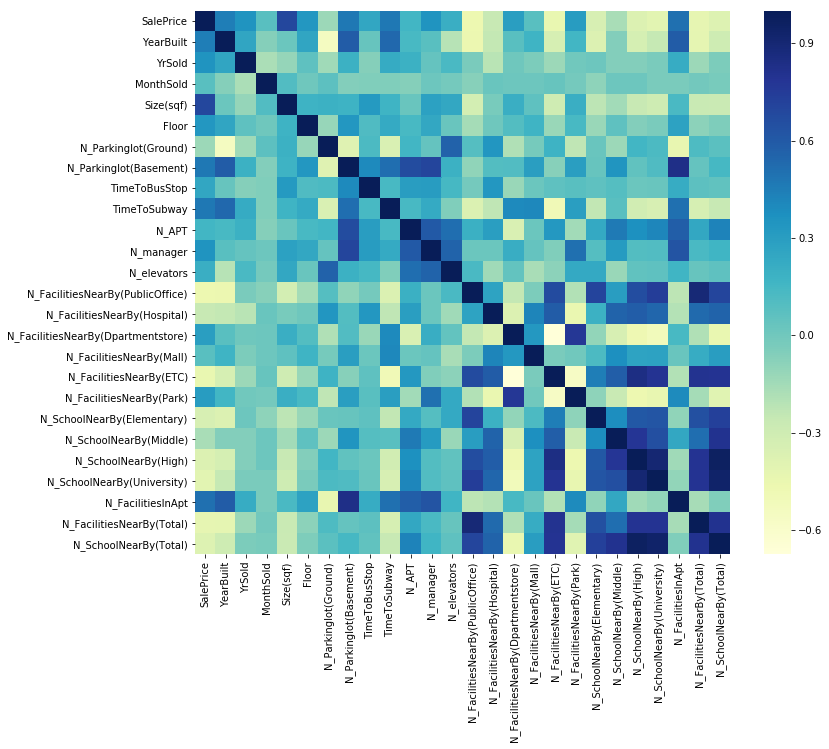

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
corr = real.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [16]:
corr.iloc[0]

SalePrice                             1.000000
YearBuilt                             0.447875
YrSold                                0.357682
MonthSold                             0.081924
Size(sqf)                             0.697199
Floor                                 0.336729
N_Parkinglot(Ground)                 -0.130549
N_Parkinglot(Basement)                0.473252
TimeToBusStop                         0.252062
TimeToSubway                          0.473886
N_APT                                 0.162684
N_manager                             0.358329
N_elevators                           0.208248
N_FacilitiesNearBy(PublicOffice)     -0.462234
N_FacilitiesNearBy(Hospital)         -0.257282
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_FacilitiesNearBy(Mall)              0.082979
N_FacilitiesNearBy(ETC)              -0.442299
N_FacilitiesNearBy(Park)              0.310906
N_SchoolNearBy(Elementary)           -0.341186
N_SchoolNearBy(Middle)               -0.166439
N_SchoolNearB

In [18]:
real['SalePrice'].skew()

0.4648820296365507

## Data Selection

In [20]:
# select numeric features
features = real.dtypes[real.dtypes != "object"].index

# make new dataframe
real = real[features]

In [22]:
real.shape

(5891, 26)

## Standardization

In [23]:
from sklearn import preprocessing

X = real.iloc[:, 1:].values
y= real.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

In [108]:
X_std

array([[ 0.34671835, -1.95675376, -0.3596163 , ..., -0.02356593,
        -0.51582027, -0.3372489 ],
       [-2.03004898, -1.95675376, -0.96180259, ..., -1.06760797,
        -1.85560129, -1.20226274],
       [-2.03004898, -1.95675376, -0.96180259, ..., -1.06760797,
        -1.85560129, -1.20226274],
       ...,
       [ 0.45989774,  1.49151986, -0.21636494, ..., -0.02356593,
        -0.51582027,  1.8252857 ],
       [-2.82230476,  1.49151986,  1.00127165, ..., -0.02356593,
        -0.51582027, -1.20226274],
       [ 0.45989774,  1.49151986, -0.21636494, ..., -0.02356593,
        -0.51582027,  1.8252857 ]])

#### Cross-Validation

Untuk membangun modelnya, kami akan menggunakan rasio pembagian train:test adalah 7:3.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

In [25]:
from sklearn import linear_model

# fit linear model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
coef = lr.coef_
lr.coef_

array([ 14738.23205949,  34189.27676717,   7541.02200033,  63467.15844623,
         8195.34362488,  -5026.28793257,  13636.25579998,   8034.62867824,
         9484.67331661, -26940.50190258,  -6655.16086884,  24820.15811252,
       -22053.10239306,  -2268.35971166,  39779.34239159, -17175.77298963,
        21950.03113441, -28650.389844  ,  -9748.78866437,  -2480.76053437,
         1352.08635641,  10808.53151781,  28964.57910619,   4111.23826911,
         1423.9461417 ])

In [28]:
coef_real = pd.Series(coef, index=real.columns[1:])
coef_real

YearBuilt                             14738.232059
YrSold                                34189.276767
MonthSold                              7541.022000
Size(sqf)                             63467.158446
Floor                                  8195.343625
N_Parkinglot(Ground)                  -5026.287933
N_Parkinglot(Basement)                13636.255800
TimeToBusStop                          8034.628678
TimeToSubway                           9484.673317
N_APT                                -26940.501903
N_manager                             -6655.160869
N_elevators                           24820.158113
N_FacilitiesNearBy(PublicOffice)     -22053.102393
N_FacilitiesNearBy(Hospital)          -2268.359712
N_FacilitiesNearBy(Dpartmentstore)    39779.342392
N_FacilitiesNearBy(Mall)             -17175.772990
N_FacilitiesNearBy(ETC)               21950.031134
N_FacilitiesNearBy(Park)             -28650.389844
N_SchoolNearBy(Elementary)            -9748.788664
N_SchoolNearBy(Middle)         

Text(0.5,0,'Koefisien')

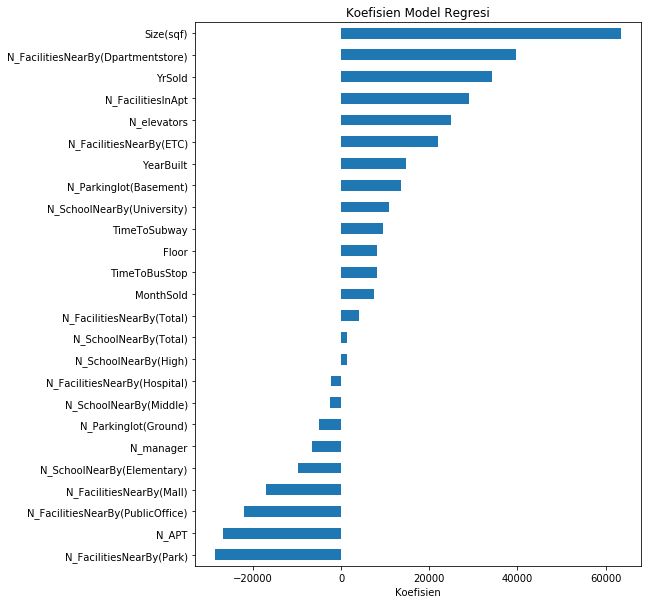

In [30]:
plt.rcParams['figure.figsize'] = (8, 10)
coef_real.sort_values().plot(kind = "barh")
plt.title("Koefisien Model Regresi")
plt.xlabel("Koefisien")

In [32]:
print ("Skor RMSE Model adalah %.3f" %(np.mean((lr.predict(X_test) - y_test)**2))**0.5)
print('Skor Variansi (Variance score) Model adalah %.3f' % lr.score(X_test, y_test))

Skor RMSE Model adalah 39276.833
Skor Variansi (Variance score) Model adalah 0.862


Text(0,0.5,'Actual price')

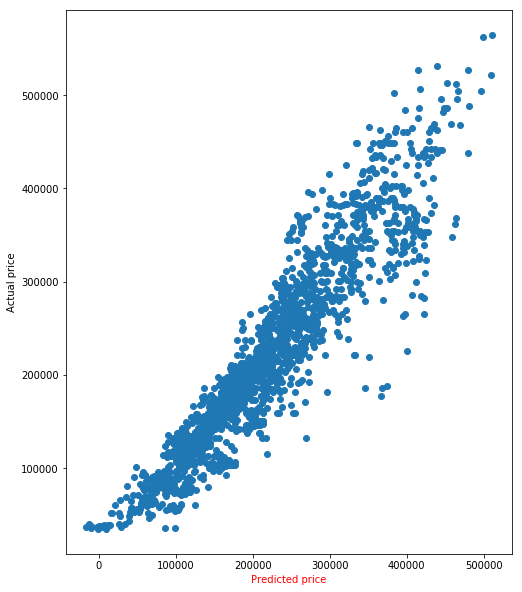

In [35]:
plt.scatter(lr.predict(X_test), y_test)

plt.xlabel('Predicted price')
plt.ylabel('Actual price')

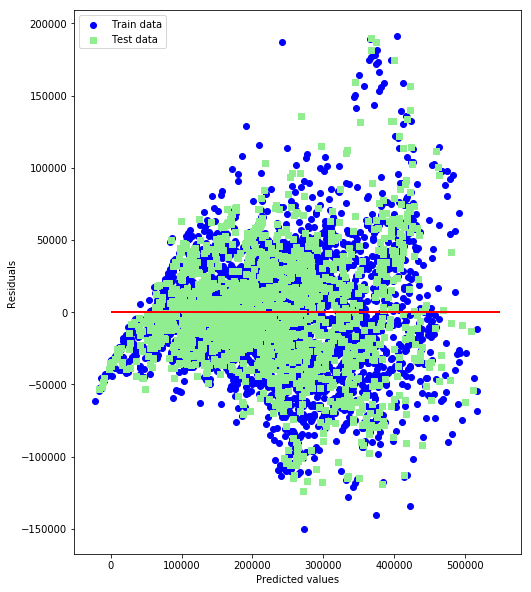

In [34]:
# residual plot
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Train data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0 ,xmin=0, xmax=550000, lw=2, color='red')
plt.show()

In [38]:
print("Skor RMSE Data Train adalah %.2f" % mean_squared_error(y_train, y_train_pred)**0.5)
print("Skor RMSE Data Test  adalah %.2f"  % mean_squared_error(y_test, y_test_pred)**0.5)

Skor RMSE Data Train adalah 38869.64
Skor RMSE Data Test  adalah 39276.83


## Dealing with Outliers

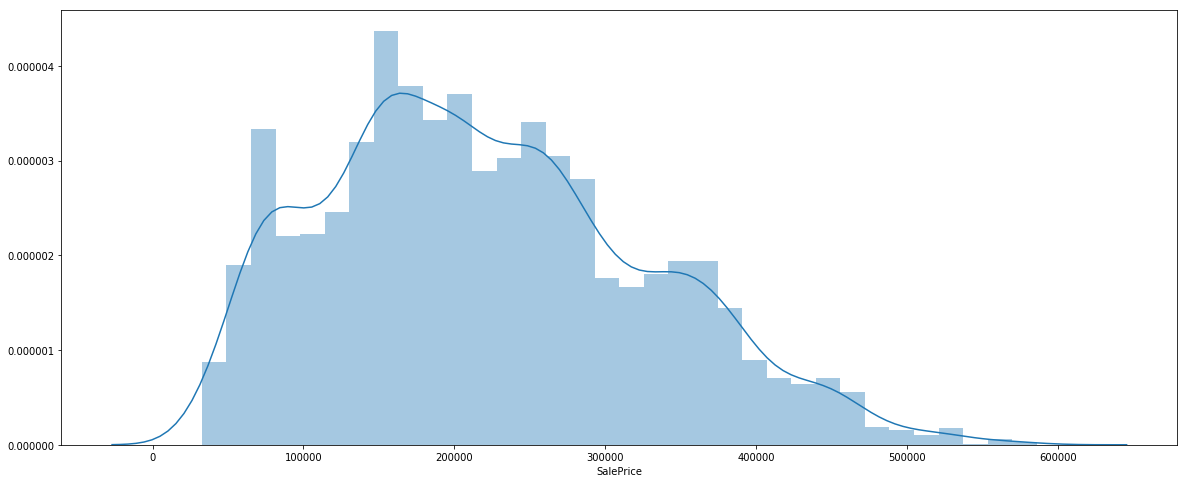

In [39]:
plt.figure(figsize=(20,8))
sns.distplot(real['SalePrice'])

In [40]:
real['SalePrice'].describe()

count      5891.000000
mean     221218.112545
std      106384.186446
min       32743.000000
25%      144247.000000
50%      207964.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64

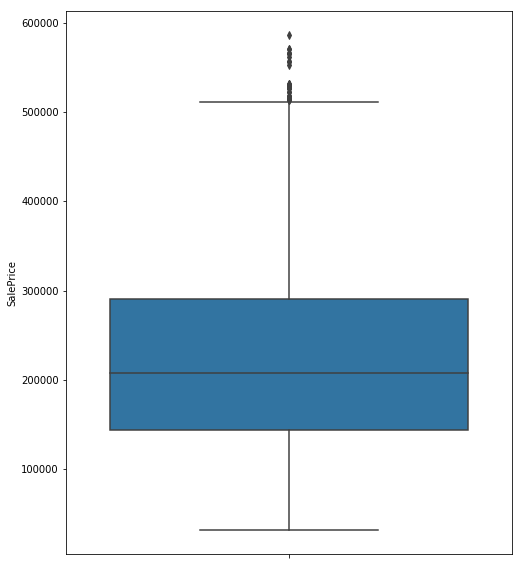

In [41]:
sns.boxplot(y=real['SalePrice'])

Dari boxplot, kita dapat informasi bahwa harga yang berkisar dari $WON 510000$ dollar keatas adalah outliers kita.

Let's subtract those outliers.

In [46]:
real.sort_values(by='SalePrice').loc[real['SalePrice']>500500]

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
522,501769,2007,2009,1,1928,3,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
521,501769,2007,2009,1,1928,2,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5440,504424,2007,2017,3,1519,33,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4492,504424,2007,2015,10,1643,39,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5579,504424,2007,2017,6,1690,26,7.0,605.0,2,4,...,1.0,0.0,1.0,2.0,1.0,1.0,1.0,5,9.0,5.0
4938,504424,2007,2016,5,1928,22,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4824,507079,2007,2016,2,1387,38,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4453,508849,2007,2015,9,1643,26,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5886,511504,2007,2017,8,1643,19,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4826,513274,2007,2016,2,1643,32,0.0,1270.0,2,4,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0


Let's refit model, after removing 43 outliers from data frame.

In [48]:
adj_real = real.drop(real.loc[real['SalePrice']>500500].index, axis=0)

In [49]:
X = adj_real.iloc[:, 1:].values
y= adj_real.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# refit linear model
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_real = pd.Series(coef, index=adj_real.columns[1:])

In [50]:
print ("Skor RMSE Model adalah %.2f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)
print('Skor Variansi (Variance score) Model adalah %.2f' % slr.score(X_test, y_test))

#Skor RMSE Model adalah 39276.833
#Skor Variansi (Variance score) Model adalah 0.862

Skor RMSE Model adalah 37841.40
Skor Variansi (Variance score) Model adalah 0.87


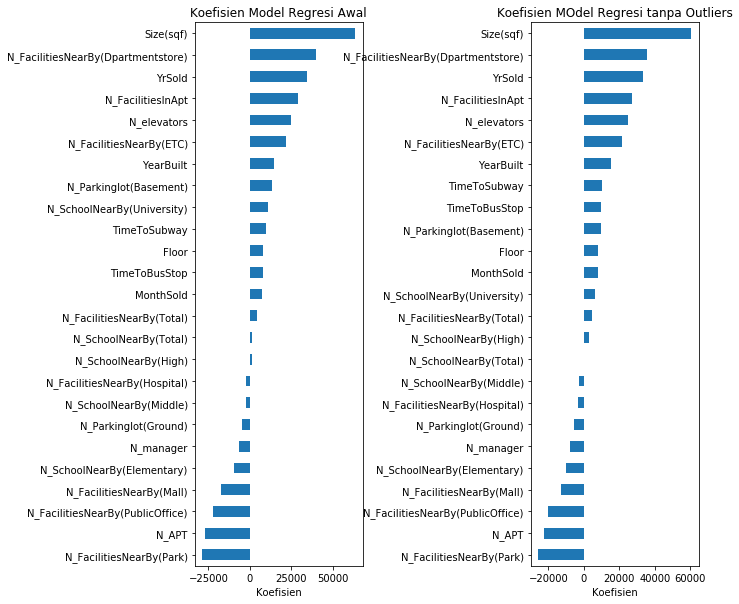

In [52]:
# compare
fig, ax = plt.subplots(nrows=1, ncols=2)

plt.subplot(1, 2, 1)
plt.rcParams['figure.figsize'] = (8, 10)
coef_real.sort_values().plot(kind = "barh")
plt.title("Koefisien Model Regresi Awal")
plt.xlabel("Koefisien")


plt.subplot(1, 2, 2)
plt.rcParams['figure.figsize'] = (8, 10)
adj_coef_real.sort_values().plot(kind = "barh")
plt.title("Koefisien Model Regresi tanpa Outliers")
plt.xlabel("Koefisien")

plt.subplots_adjust(wspace=1, right=1)

### Delete Some Features with Low Coefficient.

In [53]:
adj_real.drop(['N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(High)', 
             'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(Total)', 'N_Parkinglot(Ground)'], axis=1, inplace=True)

weirdest thing is number of elevators and number of parking(basement) have high coefficient.

It doesn't make sense that people would so much care of number of elevators in apartment or number of parking space when they considering buy apartment.

Yuk, kita lihat.

In [56]:
adj_real.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'N_FacilitiesNearBy(PublicOffice)',
       'N_FacilitiesNearBy(Hospital)', 'N_FacilitiesNearBy(Dpartmentstore)',
       'N_FacilitiesNearBy(Mall)', 'N_FacilitiesNearBy(ETC)',
       'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)',
       'N_SchoolNearBy(University)', 'N_FacilitiesInApt'],
      dtype='object')

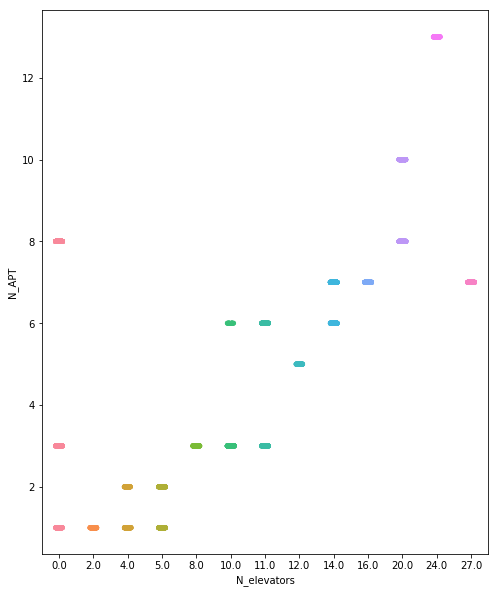

In [57]:
sns.stripplot(x='N_elevators', y='N_APT', data=adj_real)

I see linear pattern between number of apartments and number of elevators.

It is obvious that the more people stay in apartments, the more elevators are needed.

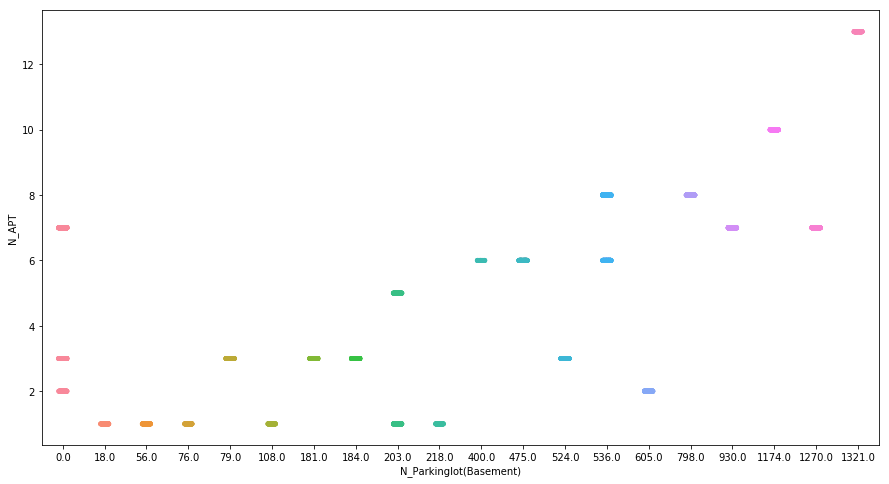

In [58]:
fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(x='N_Parkinglot(Basement)', y='N_APT', data=adj_real)

number parking spaces and number of apartments seem to have linear relation except some outlier points.

In [59]:
# delete more features
adj_real.drop(['N_elevators', 'N_Parkinglot(Basement)', 'MonthSold'], axis=1, inplace=True)

In [60]:
adj_real.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'Size(sqf)', 'Floor',
       'TimeToBusStop', 'TimeToSubway', 'N_APT', 'N_manager',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt'],
      dtype='object')

## Re-Fit Model Kita

In [61]:
X = adj_real.iloc[:, 1:].values
y= adj_real.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# fit linear model
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_real = pd.Series(coef, index=adj_real.columns[1:])

Text(0.5,0,'Koefisien')

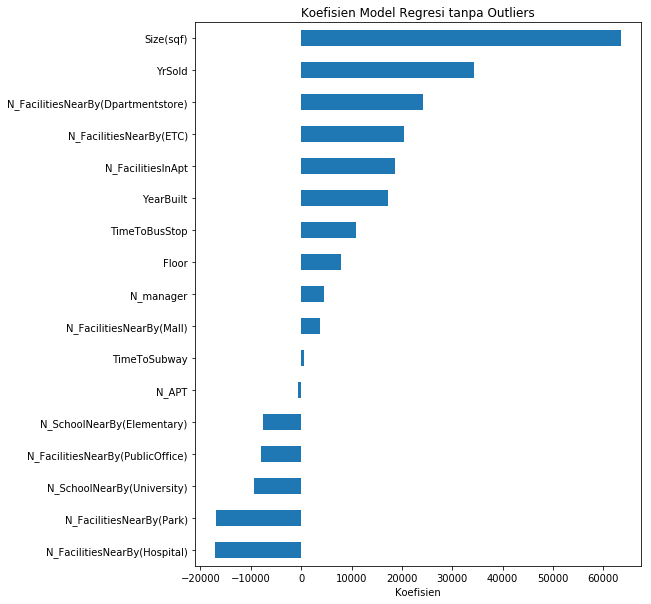

In [63]:
plt.rcParams['figure.figsize'] = (8, 10)
adj_coef_real.sort_values().plot(kind = "barh")
plt.title("Koefisien Model Regresi tanpa Outliers")
plt.xlabel("Koefisien")

Text(0,0.5,'Actual price')

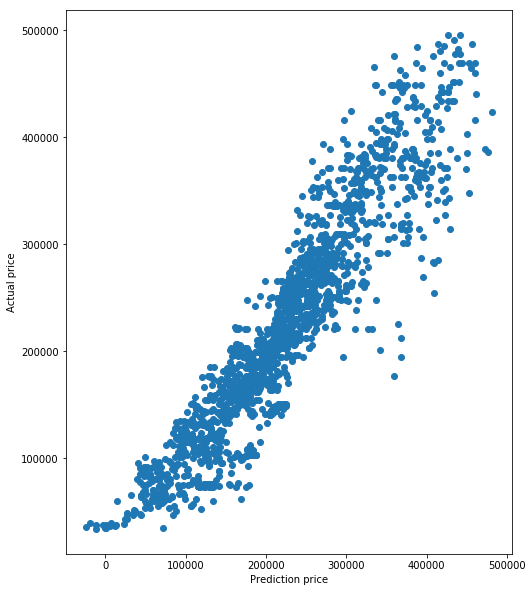

In [66]:
plt.scatter(slr.predict(X_test), y_test)

plt.xlabel('Prediction price')
plt.ylabel('Actual price')

In [65]:
print("#======================Ketiga=======================#")
print ("Skor RMSE Model adalah %.3f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)
print('Skor Variansi (Variance score) Model adalah %.3f' % slr.score(X_test, y_test))

#======================Awal=======================#
#Skor RMSE Model adalah 39276.833
#Skor Variansi (Variance score) Model adalah 0.862

#======================Kedua=======================#
#Skor RMSE Model adalah 37841.40
#Skor Variansi (Variance score) Model adalah 0.87

#======================Ketiga=======================#
Skor RMSE Model adalah 39664.420
Skor Variansi (Variance score) Model adalah 0.854


Hasil yang terlihat buruk, artinya model ini tidak dapat memprediksi dengan baik apabila kita menghapus features pada data penelitiannya.

### Optimization

RMSE (about 39664.420) and residual plot showing us that model can not predict well.

For better result, markipul eh salah, maksudnya mari kita optimisasikan.

#### Gradient Descent

In [67]:
from sklearn import ensemble

X = adj_real.iloc[:, 1:].values
y= adj_real.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

In [68]:
#Fit regression model

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
rmse = mean_squared_error(y_test, clf.predict(X_test))**0.5
print("Skor RMSE Model adalah %.3f" % rmse)

Skor RMSE Model adalah 17790.771


Text(0,0.5,'Deviasi')

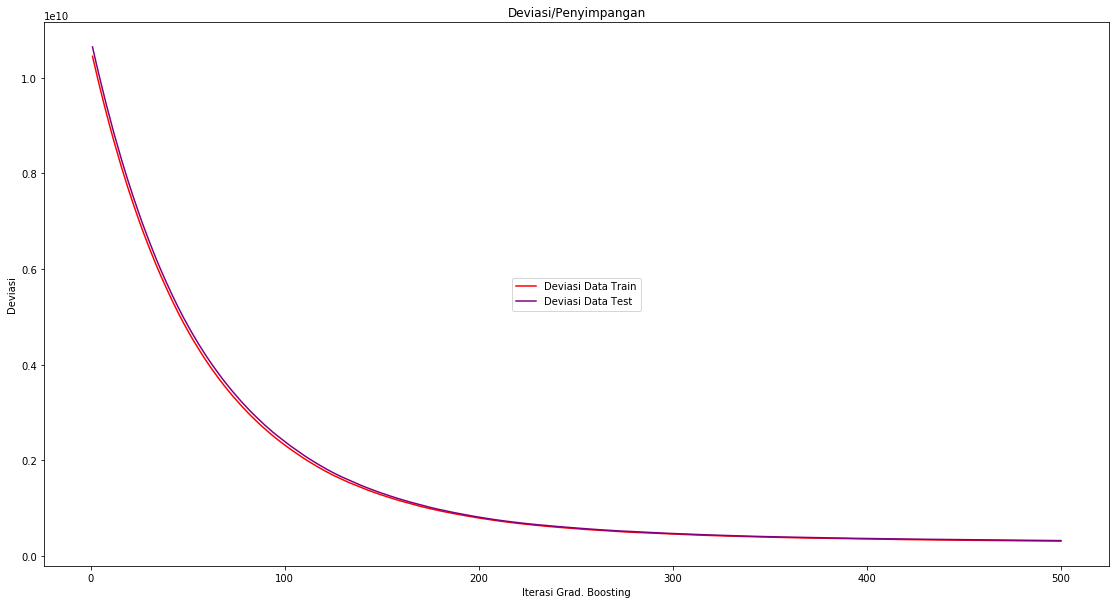

In [92]:
#Plot Deviasi Data Training

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(42, 10))
plt.subplot(1, 2, 1)
plt.title('Deviasi/Penyimpangan')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'red',
         label='Deviasi Data Train')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'purple',
         label='Deviasi Data Test')
plt.legend(loc='center')
plt.xlabel('Iterasi Grad. Boosting')
plt.ylabel('Deviasi')

In [81]:
# Plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

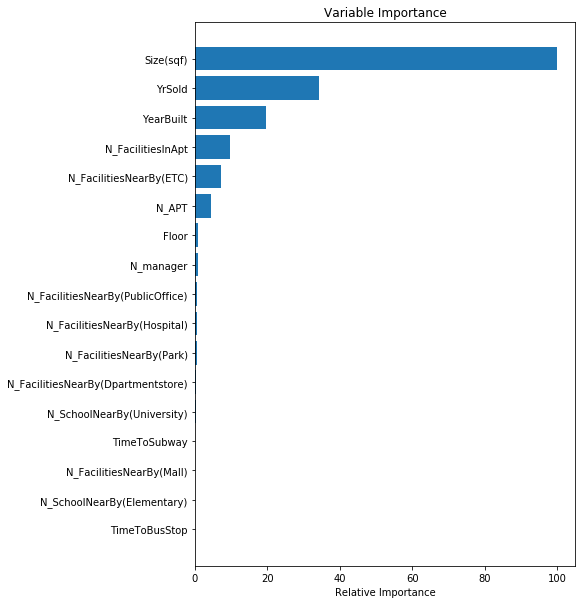

In [82]:
sort_index = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplots(figsize=(15, 10))
plt.subplot(1, 2, 2)

# exclude target variable in data frame
adj_real.drop('SalePrice', axis=1, inplace=True)

plt.barh(pos, feature_importance[sort_index], align='center')
plt.yticks(pos, adj_real.columns[sort_index])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Text(0,0.5,'Actual price')

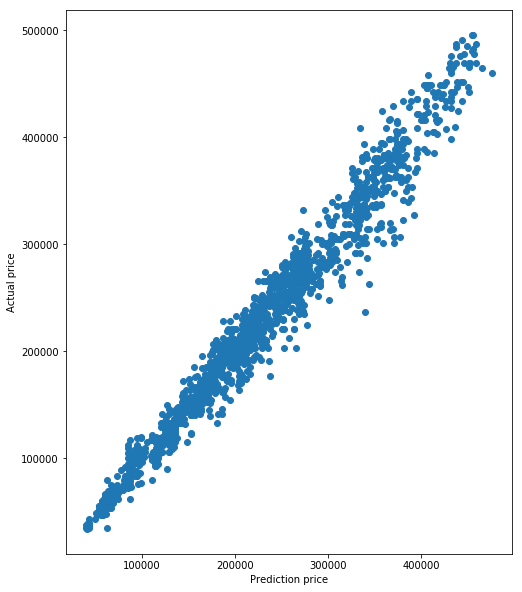

In [83]:
plt.scatter(clf.predict(X_test), y_test)

plt.xlabel('Prediction price')
plt.ylabel('Actual price')

In [96]:
adj_real.columns[sort_index]

Index(['TimeToBusStop', 'N_SchoolNearBy(Elementary)',
       'N_FacilitiesNearBy(Mall)', 'TimeToSubway',
       'N_SchoolNearBy(University)', 'N_FacilitiesNearBy(Dpartmentstore)',
       'N_FacilitiesNearBy(Park)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(PublicOffice)', 'N_manager', 'Floor', 'N_APT',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesInApt', 'YearBuilt', 'YrSold',
       'Size(sqf)'],
      dtype='object')

In [105]:
feature_importance[sort_index].counts_value()

array([1.97493280e+01, 3.43817067e+01, 1.00000000e+02, 9.88023373e-01,
       5.93331985e-02, 2.17485620e-01, 4.41648213e+00, 8.37511326e-01,
       7.40790563e-01, 6.37852981e-01, 2.91258293e-01, 2.16599383e-01,
       7.26566293e+00, 5.51268943e-01, 1.02012834e-01, 2.87789451e-01,
       9.61686250e+00])

In [106]:
adj_real.columns[sort_index]

Index(['TimeToBusStop', 'N_SchoolNearBy(Elementary)',
       'N_FacilitiesNearBy(Mall)', 'TimeToSubway',
       'N_SchoolNearBy(University)', 'N_FacilitiesNearBy(Dpartmentstore)',
       'N_FacilitiesNearBy(Park)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(PublicOffice)', 'N_manager', 'Floor', 'N_APT',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesInApt', 'YearBuilt', 'YrSold',
       'Size(sqf)'],
      dtype='object')

In [110]:
real['N_APT']

0       3.0
1       1.0
2       1.0
3       6.0
4       8.0
       ... 
5886    7.0
5887    3.0
5888    7.0
5889    2.0
5890    7.0
Name: N_APT, Length: 5891, dtype: float64

size(sqf)
YrSold
YearBuilt
Floor
Number of Facilities in Apartments